In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/diabetes (1).csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.nan)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

<Axes: >

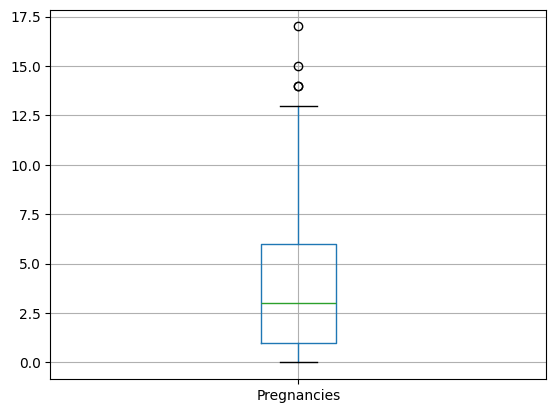

In [11]:
data.boxplot('Pregnancies')

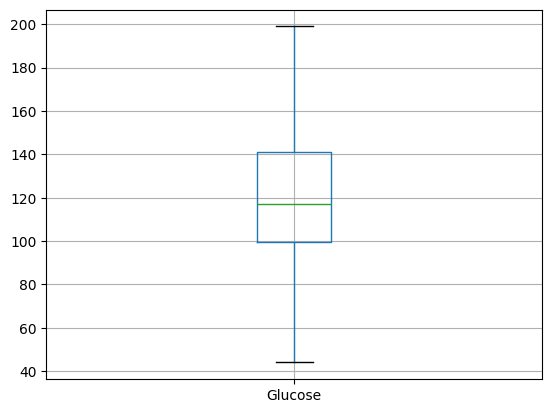

In [12]:
data.boxplot('Glucose')
plt.show()

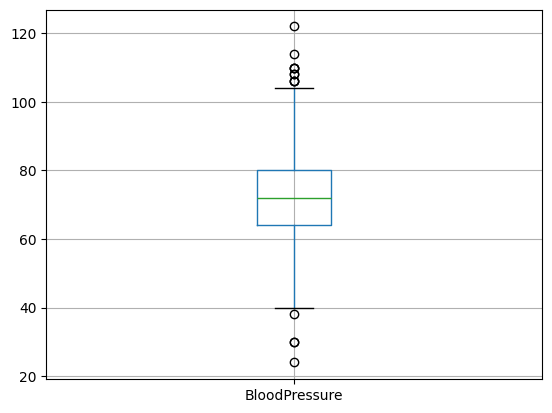

In [13]:
data.boxplot('BloodPressure')
plt.show()

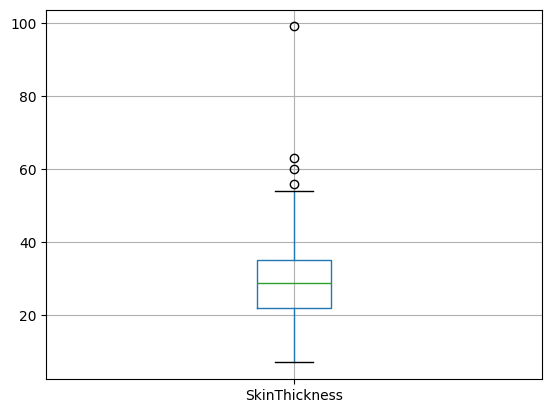

In [14]:
data.boxplot('SkinThickness')
plt.show()

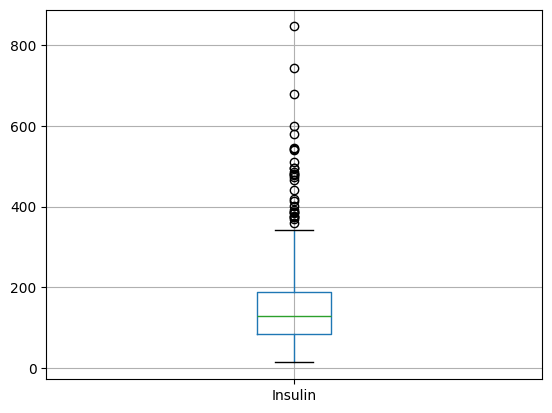

In [15]:
data.boxplot('Insulin')
plt.show()


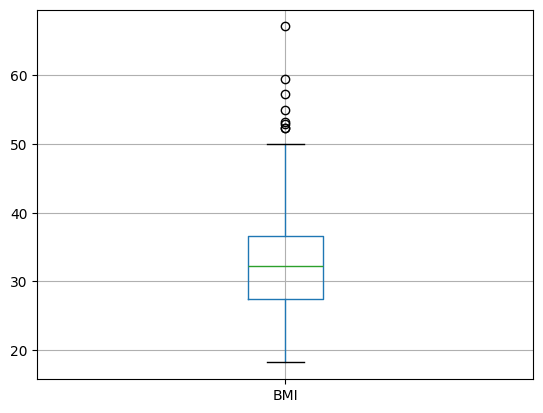

In [16]:
data.boxplot('BMI')
plt.show()

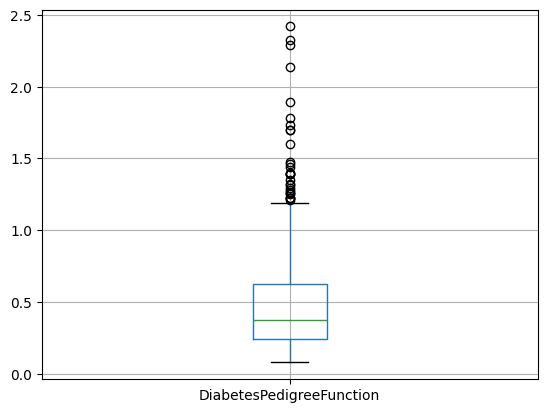

In [17]:
data.boxplot('DiabetesPedigreeFunction')
plt.show()

In [18]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

1.LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred=log.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [23]:
confusion_matrix(y_test,y_pred)

array([[85, 14],
       [19, 36]])

In [24]:
print('Accuracy_score=', accuracy_score(y_test,y_pred))
print('Precision_score=', precision_score(y_test,y_pred))
print('Recall_score=', recall_score(y_test,y_pred))
print('F1_score=',f1_score(y_test,y_pred))

Accuracy_score= 0.7857142857142857
Precision_score= 0.72
Recall_score= 0.6545454545454545
F1_score= 0.6857142857142857


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [26]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred_sc=model1.predict(x_test)

In [28]:
confusion_matrix(y_test,y_pred_sc)

array([[85, 14],
       [19, 36]])

In [30]:
print('Accuracy_score=', accuracy_score(y_test,y_pred_sc))
print('Precision_score=', precision_score(y_test,y_pred_sc))
print('Recall_score=', recall_score(y_test,y_pred_sc))
print('F1_score=',f1_score(y_test,y_pred_sc))

Accuracy_score= 0.7857142857142857
Precision_score= 0.72
Recall_score= 0.6545454545454545
F1_score= 0.6857142857142857


2.KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
metrik_k=[]
neighbors=np.arange(1,11)
for k in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metrik_k.append(acc)

In [37]:
metrik_k

[0.6298701298701299,
 0.6688311688311688,
 0.6818181818181818,
 0.6623376623376623,
 0.6883116883116883,
 0.7012987012987013,
 0.6883116883116883,
 0.7272727272727273,
 0.7077922077922078,
 0.7077922077922078]

Text(0, 0.5, 'accuracy')

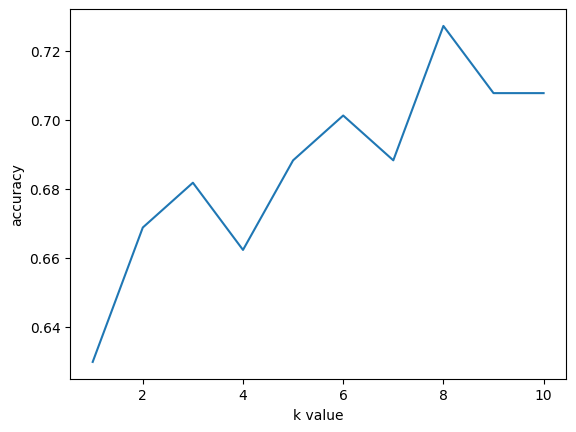

In [41]:
plt.plot(neighbors,metrik_k)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [42]:
classifier=KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=8)

In [51]:
y_pred_cl=classifier.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [25, 30]])

In [53]:
print('Accuracy_score=', accuracy_score(y_test,y_pred_cl))
print('Precision_score=', precision_score(y_test,y_pred_cl))
print('Recall_score=', recall_score(y_test,y_pred_cl))
print('F1_score=',f1_score(y_test,y_pred_cl))

Accuracy_score= 0.7272727272727273
Precision_score= 0.6382978723404256
Recall_score= 0.5454545454545454
F1_score= 0.5882352941176471


3.SVM

In [47]:
from sklearn.svm import SVC
sv=SVC()

In [49]:
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
confusion_matrix(y_test,y_pred_sv)

array([[85, 14],
       [23, 32]])

In [54]:
print('Accuracy_score=', accuracy_score(y_test,y_pred_sv))
print('Precision_score=', precision_score(y_test,y_pred_sv))
print('Recall_score=', recall_score(y_test,y_pred_sv))
print('F1_score=',f1_score(y_test,y_pred_sv))

Accuracy_score= 0.7597402597402597
Precision_score= 0.6956521739130435
Recall_score= 0.5818181818181818
F1_score= 0.6336633663366337


4.Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
confusion_matrix(y_test,y_pred_nb)

array([[78, 21],
       [16, 39]])

In [56]:
print('Accuracy_score=', accuracy_score(y_test,y_pred_nb))
print('Precision_score=', precision_score(y_test,y_pred_nb))
print('Recall_score=', recall_score(y_test,y_pred_nb))
print('F1_score=',f1_score(y_test,y_pred_nb))

Accuracy_score= 0.7597402597402597
Precision_score= 0.65
Recall_score= 0.7090909090909091
F1_score= 0.6782608695652174


5.Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
confusion_matrix(y_test,y_pred_dt)

array([[75, 24],
       [17, 38]])

In [59]:
print('Accuracy_score=', accuracy_score(y_test,y_pred_dt))
print('Precision_score=', precision_score(y_test,y_pred_dt))
print('Recall_score=', recall_score(y_test,y_pred_dt))
print('F1_score=',f1_score(y_test,y_pred_dt))

Accuracy_score= 0.7337662337662337
Precision_score= 0.6129032258064516
Recall_score= 0.6909090909090909
F1_score= 0.6495726495726496
